In [21]:
#Importamos nuestras librerias
import pandas as pd
import numpy as np
import warnings # para evitar tantos avisos
warnings.filterwarnings("ignore")
# Hacemos la lectura de nuestro archilvo
data_kchouse = pd.read_csv("kc_house.csv")
data_kchouse

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [48]:
# Agregamos una columna de "1" para el cálculo del intercepto
data_kchouse["Intercept"] = 1 
data_kchouse = data_kchouse[["Intercept","id","date","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]]
print(data_kchouse.shape)
data_kchouse.head()

(21613, 22)


,Intercept,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,1,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,1,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,1,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Ahora nuestra Base de datos nos queda con 21,613 filas y 22 columnas, pero para nuestro análisis posemos omitir "date" e "id" pues no tienen aportación.
- Por lo tanto para este análisis tomaremos como **variables independientes** las características, osea todas las columnas, excepto 'price', 'id', y 'date'.
- Nuestra **variable dependiente** (objetivo) será **"price"**

In [51]:
# Ahora definimos nuestro matriz X y nuestra matriz Y
Xdata = data_kchouse[["Intercept","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]]. values
Ydata = data_kchouse[["price"]]. values

Ahora haremos una base de entrenamiento y después una base de prueba para verificar nuestro modelo.

In [96]:
# Dividiremos nuestros datos en base de entrenamiento y prueba con la libreria de Sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xdata, Ydata, test_size = 0.3, random_state = 1) 

In [97]:
X = X_train
Y = Y_train

In [98]:
X.shape[0]

15129

Nos arroja una base de entrenamiento de 15,129 renglones para nuestro modelo

In [99]:
X.shape[1]

19

y conserbamos las 19 columnas que ya teniamos contempladas

In [100]:
np.set_printoptions(formatter={'float_kind' : '{:f}'.format}) #configuración del formato númerico
# Multiplicamos  nuestra Xtranspuesta * X
XT_X = np.matmul(np.matrix.transpose(X), X)
XT_X

array([[15129.000000, 50963.000000, 32017.000000, 31442387.000000,
        230231424.000000, 22665.000000, 116.000000, 3505.000000,
        51592.000000, 115894.000000, 27017390.000000, 4424997.000000,
        29820815.000000, 1271248.000000, 1483820520.000000,
        719521.906700, -1848966.397000, 30017402.000000,
        193331191.000000],
       [50963.000000, 184941.000000, 113274.250000, 113202849.000000,
        792701993.000000, 77591.000000, 372.000000, 12596.000000,
        174087.000000, 396101.000000, 96448909.000000, 16753940.000000,
        100513486.000000, 4378090.000000, 4998226160.000000,
        2423751.361100, -6228097.770000, 104817301.000000,
        662133752.000000],
       [32017.000000, 113274.250000, 76568.375000, 74367338.750000,
        529228587.750000, 51082.750000, 306.000000, 9001.500000,
        108207.500000, 254161.750000, 63571004.750000, 10796334.000000,
        63280042.500000, 2920942.750000, 3140032296.250000,
        1522745.525575, -3912539.2

In [101]:
# Sacamos la inversa de esta transpuesta
XT_X_inv = np.linalg.pinv(XT_X)  # Usamos pseudo-inversa
XT_X_inv

array([[0.000000, -0.000000, 0.000000, -0.000000, 0.000000, -0.000000,
        0.000001, -0.000000, 0.000000, -0.000000, 0.000000, -0.000000,
        0.000000, 0.000000, -0.000000, -0.000000, -0.000003, 0.000000,
        0.000000],
       [-0.000000, 0.000122, -0.000040, -0.000000, 0.000000, 0.000011,
        0.000059, 0.000010, -0.000007, 0.000020, -0.000000, -0.000000,
        0.000000, 0.000000, -0.000000, 0.000018, 0.000013, 0.000000,
        0.000000],
       [0.000000, -0.000040, 0.000374, -0.000000, -0.000000, -0.000111,
        0.000012, -0.000004, -0.000016, -0.000020, -0.000000, -0.000000,
        -0.000003, -0.000000, 0.000000, -0.000030, 0.000030, 0.000000,
        0.000000],
       [-0.000000, -0.000000, -0.000000, 0.000000, -0.000000, 0.000000,
        -0.000000, -0.000000, -0.000000, -0.000000, 0.000000, 0.000000,
        0.000000, 0.000000, -0.000000, 0.000000, -0.000000, -0.000000,
        -0.000000],
       [0.000000, 0.000000, -0.000000, -0.000000, 0.000000, 0.000000

In [102]:
# Sacamos el Vector de Coeficientes (X transpuesta * Y)
XT_Y = np.matmul(np.matrix.transpose(X),Y)
XT_Y

array([[8134792844.000000],
       [28921660282.000000],
       [19344041227.500000],
       [20285899254544.000000],
       [142407378785985.000000],
       [12932928855.500000],
       [186574092.000000],
       [3471948304.000000],
       [27861195467.000000],
       [66500354540.000000],
       [17161125245981.000000],
       [3124774008563.000000],
       [16042657850839.000000],
       [956236284337.000000],
       [797829485755029.000000],
       [387121579186.853027],
       [-994165337864.434204],
       [18255655339721.000000],
       [115936311020042.000000]])

In [103]:
# Acemos el cálculos de vector de Betas
betas = np.matmul(XT_X_inv, XT_Y)
betas

array([[61.407102],
       [-32214.035349],
       [37562.448537],
       [106.498187],
       [0.095306],
       [8777.350221],
       [563587.984464],
       [51329.265872],
       [27246.392856],
       [94983.135385],
       [70.124326],
       [36.374062],
       [-2507.056302],
       [22.227861],
       [-512.824293],
       [613521.513699],
       [-207669.952468],
       [20.152368],
       [-0.307402]])

**Medición de bondad de ajuste:**
Ahora pasaremos a medir la bondad de nuestro ajuste a travpes de los siguientes cálculos.
* TSS (Total Sum of Squares)
* ESS (Explained Sum of Squares)
* RSS (Residual Sum of Squares), con R² = 1 − RSS/TSS y R²
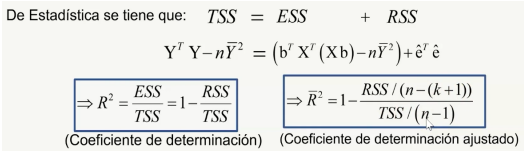

In [104]:
# Cállculamos de TSS (Suma Total de Cuadrados)
TSS = np.matmul(np.matrix.transpose(Y),(Y)) - (len(Y) * (Y.mean()**2))
TSS

array([[1900668073054776.000000]])

In [105]:
# Calculamos la ESS (Suma Explicada de Cuadrados)
ESS = np.matmul(np.matmul(np.matrix.transpose(betas), np.matrix.transpose(X)), np.matmul(X, betas)) - (len(Y)*(Y.mean()**2))
ESS

array([[1337859970289478.000000]])

In [106]:
# Calculamos la RSS (Suma Residual de Cuadrados)
RSS = TSS - ESS
RSS

array([[562808102765298.000000]])

In [107]:
# Ahora calcularemos la bondad del ajuste
# Hacemos el cálculo del coeficiente de determinación de R Cuadrada
RSq = 1 - RSS/TSS
RSq

array([[0.703889]])

In [108]:
# Calculamos R² ajustada 
n = len(Y_test)  # Número de observaciones en prueba
k = X_train.shape[1] - 1  # Número de predictores (excluyendo intercepto)
RSqAj = 1 - (1 - RSq) * (n - 1) / (n - k - 1)
RSqAj

array([[0.703065]])

In [109]:
# Sacamos el Reporte automátizado de la regresión en Python con la libreria de statsmodels
import statsmodels.api as sm
regressor = sm.OLS(Y, X).fit()
#Ahora imprimimos el objeto creado de la regresión
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2113.
Date:                Tue, 05 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:22:03   Log-Likelihood:            -2.0558e+05
No. Observations:               15129   AIC:                         4.112e+05
Df Residuals:                   15111   BIC:                         4.113e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.241e+06   3.36e+06      1.261      0.2

In [110]:
# ahora hacemos la aplicación sobre la base de prueba para sacar los pronosticos
Y_pred = np.matmul(X_test, betas)
Y_pred

array([[639278.558151],
       [475731.765744],
       [700944.305221],
       ...,
       [322304.892199],
       [2153328.315678],
       [730931.265728]])

In [111]:
# Ahora, hacemos los Calculo de Residuales 
Resid = Y_test - Y_pred
Resid

array([[-180278.558151],
       [-30731.765744],
       [356055.694779],
       ...,
       [-92304.892199],
       [-473328.315678],
       [-437931.265728]])


Métricas del Modelo Lineal:
Error Cuadrático Medio (MSE): 48325280681.77
Desviación promedio (RMSE): $219,830.12 USD
Coeficiente de Determinación (R²): 0.6904


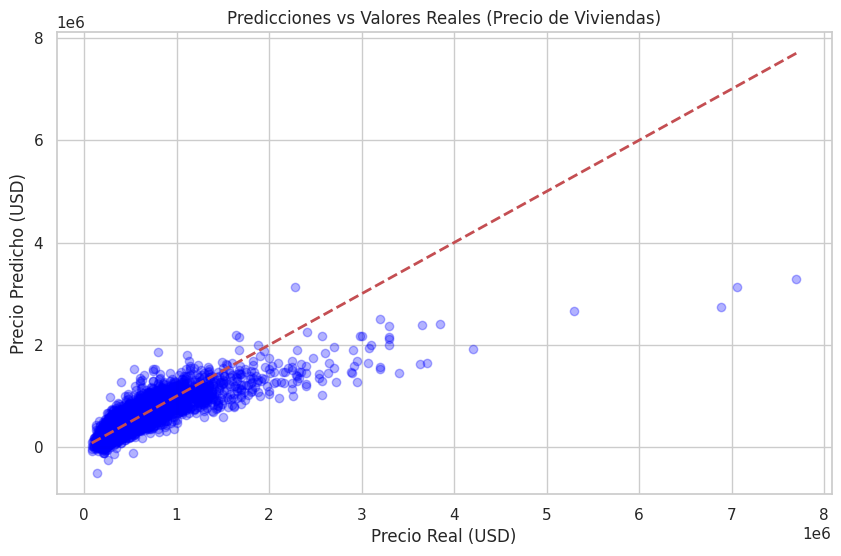

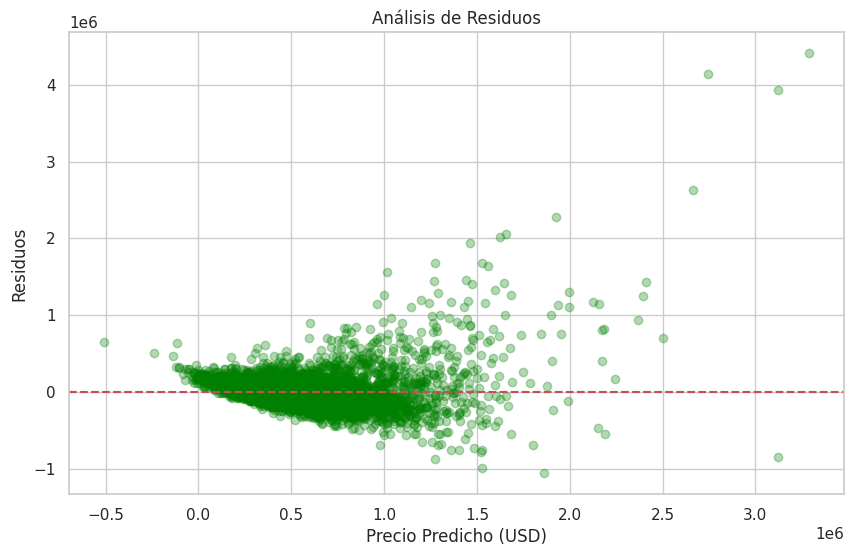

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Evaluación del modelo para nuestro gráfico
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # Raíz cuadrada del MSE
desviacion_promedio = rmse  # RMSE representa la desviación promedio
r2 = r2_score(Y_test, Y_pred)

print(f"\nMétricas del Modelo Lineal:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Desviación promedio (RMSE): ${desviacion_promedio:,.2f} USD")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

# Grámfica de resultados
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.3, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales (Precio de Viviendas)')
plt.xlabel('Precio Real (USD)')
plt.ylabel('Precio Predicho (USD)')
plt.grid(True)
plt.show()

# Gráfica de residuos
plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, Resid, alpha=0.3, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Análisis de Residuos')
plt.xlabel('Precio Predicho (USD)')
plt.ylabel('Residuos')
plt.grid(True)
plt.show()

## Análisis de Resultados

- **Desviación promedio:** $219,830.12 USD → Margen de error significativo.  
- **Coeficiente de determinación (R²):** 69.04% → No confiable para decisiones estratégicas, debido al alto error absoluto (MSE).  

### Gráfica de Predicciones  
- Patrón diagonal: puntos cercanos a la línea de referencia indican predicciones acertadas.  
- Hallazgo: alta dispersión en zonas de alto valor inmobiliario → pérdida de precisión del modelo.

### Gráfica de Residuos  
- Patrón aleatorio alrededor de cero → se cumple el supuesto de linealidad.  
- Problema detectado: mayor dispersión en predicciones altas → patrón en forma de “embudo”.jetivo price.


# Otra manera de presentar resultados con un Histograma


Métricas del Modelo Lineal:
Error Cuadrático Medio (MSE): 48325280681.77
Desviación promedio (RMSE): $219,830.12 USD
Coeficiente de Determinación (R²): 0.6904


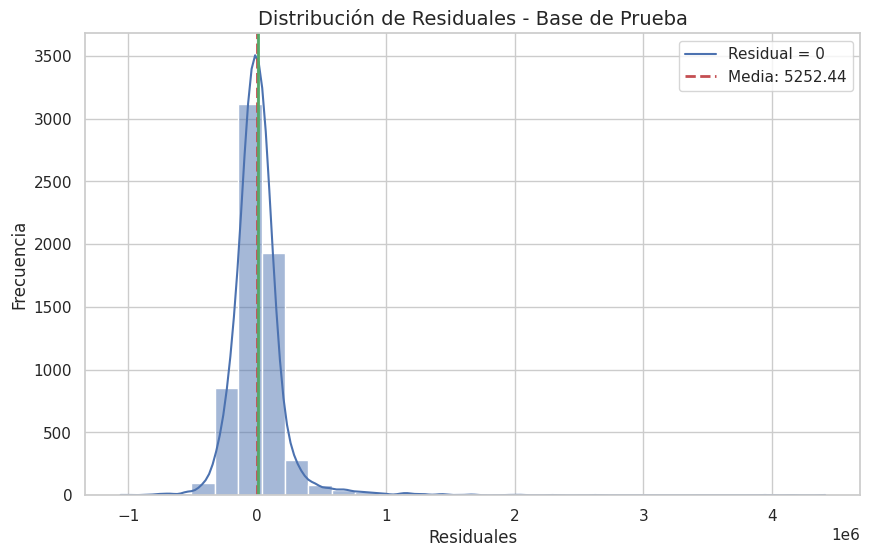

In [142]:
 # Grfafico dcel Histograma de Residuales para la base de prueba
import seaborn as sns

# Configurar estilo y tamaño
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Crear histograma con curva de densidad
sns.histplot(Resid, kde=True, bins=30, color="royalblue")

# Añadir líneas de referencia
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.axvline(x=np.mean(Resid), color='g', linestyle='-', linewidth=2)

# Personalizar etiquetas y título
plt.title('Distribución de Residuales - Base de Prueba', fontsize=14)
plt.xlabel('Residuales', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(['Residual = 0', f'Media: {np.mean(Resid):.2f}'])

# Mostrar estadísticos en el gráfico
print(f"\nMétricas del Modelo Lineal:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Desviación promedio (RMSE): ${desviacion_promedio:,.2f} USD")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
plt.show()



## Análisis de Desempeño del Modelo de Predicción

El modelo de predicción lineal analizado muestra un desempeño aceptable, aunque con un margen significativo de mejora.

Este modelo en el entrenamiento tenemos un **70% de la variabilidad de la variable objetivo**, lo que indica que es útil, pero en nuestro ensayo de predicción tenemos un **69.04%**, lo que hace que nuestro modelo no sea tan confiable y para ello tomamos como referencia la **Precisión (RMSE)** las cuales nos indican que el modelo tiene un error promedio de **$219,830 USD**, este alto valor sugiere que, a pesar de su capacidad explicativa, la precisión del modelo es baja y podría no ser adecuada para decisiones que requieran alta exactitud.

En esta gráfica tambien pordemos apreciar la distribución de errores residuales, estos se distribuyen de manera casi normal, lo cual es deseable, sin embargo, tienen una ligera tendencia a subestimar los valores reales, con una media de error de $5,252 USD.

En conclusión el modelo es funcional y captura una relación importante en los datos, pero sus predicciones son poco precisas.